In [35]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [36]:
#constants
c=2.99792e8*1e6 

In [37]:
earth_infile = '/Users/saravannah/AstroSpec/Exo_Transmit_spectra/earth.txt'
earth_wave, earth_flux = np.loadtxt(earth_infile, unpack=True, skiprows=2)
earth_wave = earth_wave * 1e6

In [38]:
#this is a big file - will take a minute to load it in
hitran_infile = '/Users/saravannah/AstroSpec/Kempton_line_lists/618ec803.out.txt'
nu_spec, S_spec, ID_spec, _, _, _, _, _ = np.loadtxt(hitran_infile, unpack=True)

In [39]:
print(max(S_spec), min(S_spec))
S_threshold = 1e-19
hitran_mini = {'nu':[], 'ID':[]}
for i in range(len(nu_spec)):
    if S_spec[i]>S_threshold:
        hitran_mini['nu'].append(nu_spec[i])
        hitran_mini['ID'].append(ID_spec[i])
        


1.179e-17 1.01e-99


In [40]:
#convert from wavenumber (in inverse cm) to wavelength (in um)
def nu_to_lambda(nu):
    return 1e3*np.reciprocal(nu)

In [41]:
def get_name(ID):
    names = {'1':'H2O', '2':'CO2', '3':'O3','4':'N2O','5':'CO','6':'CH4','7':'O2','8':'NO','9':'SO2',
           '10':'NO2','11':'NH3','12':'HNO3','13':'OH','14':'HF','15':'HCl','16':'HBr','17':'HI','18':'ClO',
           '19':'OCS','20':'H2CO','21':'HOCl','22':'N2','23':'HCN','24':'CH3Cl','25':'H2O2','26':'C2H2',
           '27':'C2H6','28':'PH3', '29':'COF3', '30':'SF6','31':'H2S','32':'HCOOH','33':'HO2','34':'O',
           '35':'ClONO2','36':'NO+','37':'HOBr','38':'C2H4','39':'CH3OH','40':'CH3Br','41':'CH3CN','42':'CF4',
           '43':'C4H2','44':'HC3N','45':'H2','46':'CS','47':'SO3','48':'C2N2','49':'COCl2','50':'SO','51':'CH3F',
           '52':'GeH4','53':'CS2','54':'CH3I','55':'NF3'}
    molec_name = names[str(int(ID))]
    return molec_name

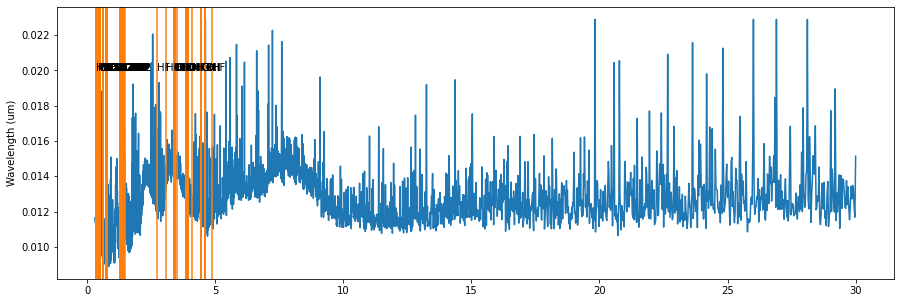

In [42]:
plt.plot(earth_wave, earth_flux)
#this also takes a minute - drawing vertical lines is expensive in Python
for i,mywave in enumerate(hitran_mini['nu']):
    plt.axvline(nu_to_lambda(hitran_mini['nu'][i]),color='C1')
    plt.text(nu_to_lambda(hitran_mini['nu'][i]),0.02,get_name(hitran_mini['ID'][i]))

#plt.xscale('log')
plt.ylabel('Wavelength (um)')
#plt.xlim([0,5])
plt.gcf().set_size_inches(15, 5)